In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

data_merged_unfinished = pd.merge(study_results, mouse_metadata,  on= 'Mouse ID' , how= 'outer' )

# display(study_results)
data_merged_unfinished

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [40]:
# Checking the number of mice.
mice_count = len(data_merged_unfinished['Mouse ID'].unique())
mice_count

249

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_mask = data_merged_unfinished.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicates_data = data_merged_unfinished[duplicates_mask]

#the unique 'Mouse ID' values of the tainted mice
tainted_mouse_ids = duplicates_data['Mouse ID'].unique()
# Use boolean indexing to select rows where the 'Mouse ID' is not in the tainted_mouse_ids list
clean_data = data_merged_unfinished.loc[~data_merged_unfinished['Mouse ID'].isin(tainted_mouse_ids)]


display(clean_data)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [42]:
tainted_mouse_ids = duplicates_data['Mouse ID'].unique()
tainted_mouse_ids

array(['g989'], dtype=object)

In [43]:
# Optional: Get all the data for the duplicate mouse ID. 
tainted_data = data_merged_unfinished.loc[data_merged_unfinished['Mouse ID'].isin(tainted_mouse_ids)]
tainted_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [44]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean=clean_data['Mouse ID'].unique()
len(mice_count_clean)

248

In [45]:
#using gropby method to group drug regimen
regimen_grouped_data = clean_data.groupby('Drug Regimen')
regimen_grouped_data


In [46]:
# calculating the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tumor_volume = regimen_grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = regimen_grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = regimen_grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = regimen_grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = regimen_grouped_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume})
display(summary_statistics)



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# Using the aggregation method, produce the same summary statistics in a single line.
summary_statistics_aggregation = regimen_grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics_aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


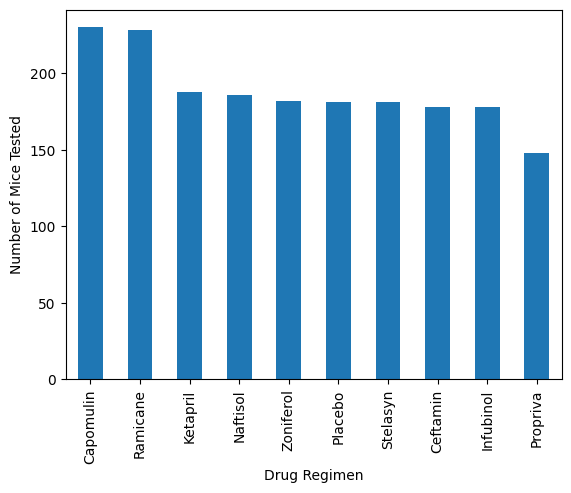

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#counting the timepoints in the grouped data 
timepoints_count = regimen_grouped_data['Timepoint'].count()
timepoints_count_sorted = timepoints_count.sort_values(ascending=False)
#creating bar blot
timepoints_count_sorted.plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Mice Tested')
plt.show()


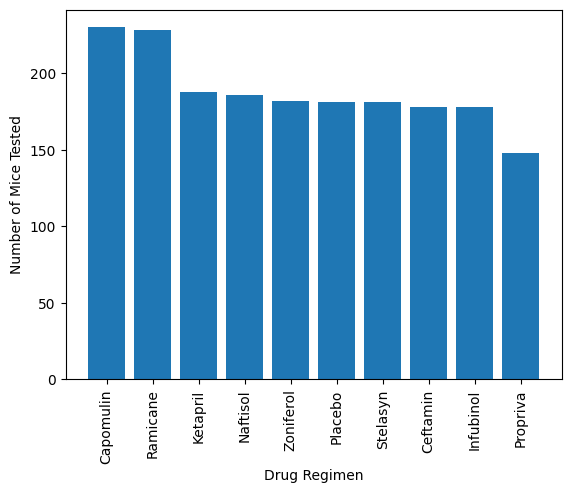

In [49]:
# creating a plot using pyplot
plt.bar(timepoints_count_sorted.index, timepoints_count_sorted.values)

#labels for x-axis and y-axis
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

#rotating the x-axis labels
plt.xticks(rotation=90)

plt.show()



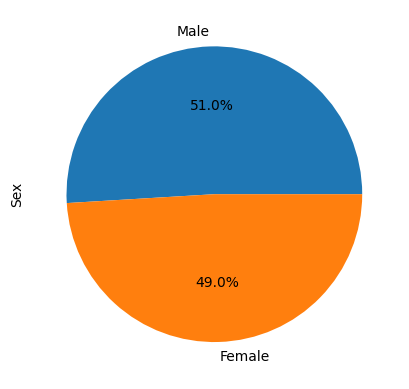

In [50]:
# Group the merged_data DataFrame by the 'Sex' column and count the number of unique mice
sex_distribution = clean_data['Sex'].value_counts()
#pie plot
sex_distribution.plot(kind='pie',autopct='%1.1f%%')

plt.ylabel('Sex')
plt.show()


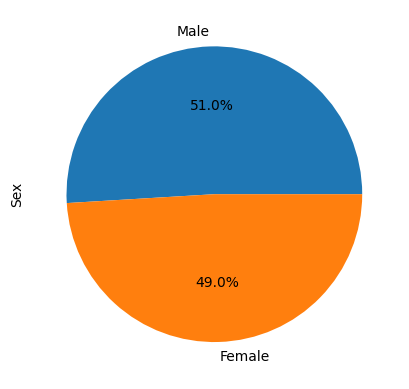

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution.values, labels=sex_distribution.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

In [52]:
treatments_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') |
                           (clean_data['Drug Regimen'] == 'Ramicane') |
                           (clean_data['Drug Regimen'] == 'Infubinol') |
                           (clean_data['Drug Regimen'] == 'Ceftamin')]


# Group the filtered_data DataFrame by 'Mouse ID' and get the last (greatest) timepoint for each mouse
greatest_timepoint = treatments_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_volume = pd.merge(greatest_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='left')



In [53]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_data = []

# Iterateing through the list of treatments
for treatment in treatments:
    
    # rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = last_tumor_volume.loc[last_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Adding tumor volumes to the tumor_vol_data list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculating the IQR
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determining outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Convert the NumPy array to a pandas Series
    outliers = pd.Series(outliers.values, name='Tumor Volume (mm3)').reset_index(drop=True)
    
    
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 0    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


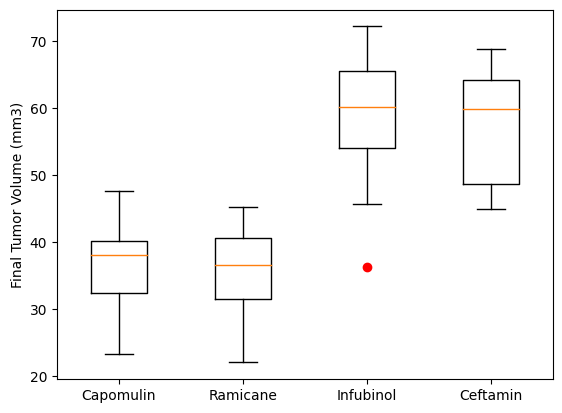

In [54]:
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, sym='r')
ax.set_xticklabels(treatments)
# Add labels and a title to the plot
ax.set_ylabel('Final Tumor Volume (mm3)')
# Display the plot
plt.show()

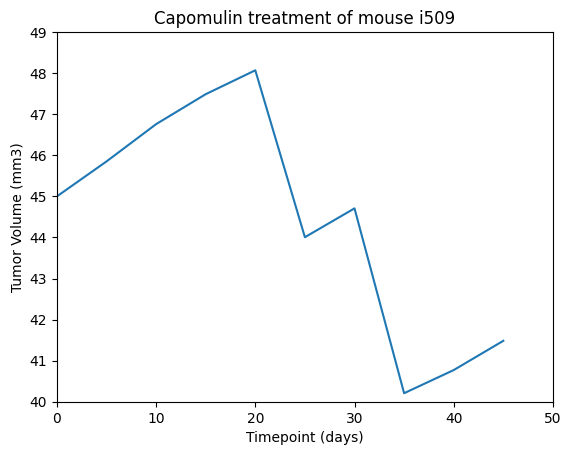

In [55]:
#using .loc to specify the Mouse with ID =l509 and the Regimen capomulin
mouse_l509 = clean_data.loc[(clean_data["Mouse ID"] == "l509") & (clean_data["Drug Regimen"] == "Capomulin")]

# Create a line plot of tumor volume vs. time point
plt.plot(mouse_l509["Timepoint"], mouse_l509["Tumor Volume (mm3)"])

# Set the y-axis limits to 40-49
plt.ylim(40, 49)

# Set the x-axis limits to 0-50
plt.xlim(0, 50)

# Adding labels and title to the plot
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse i509")

# Display the plot
plt.show()








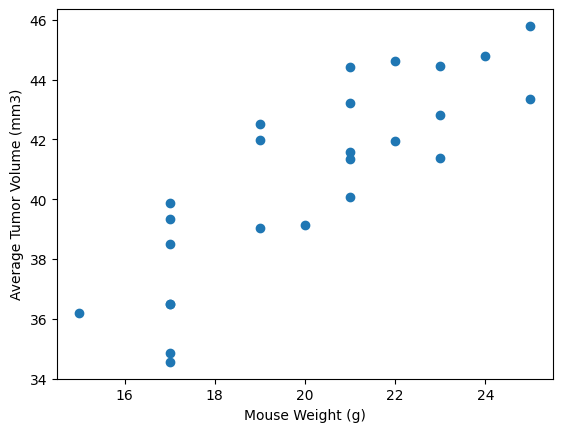

In [56]:

capomulin_rows = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]

# the average tumor volume and mouse weight for each mouse using .loc and .mean()
mouse_data = capomulin_rows.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]].groupby("Mouse ID").mean()

# Create a scatter plot of average tumor volume vs. mouse weight
plt.scatter(mouse_data.loc[:, "Weight (g)"], mouse_data.loc[:, "Tumor Volume (mm3)"])

# Add labels and a title to the plot
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the plot
plt.show()
